In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
x_train = iris.data

In [3]:
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear')) # Output 4 features
    return model

In [4]:
def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [5]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [6]:
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

In [7]:
generator.compile(loss='mean_squared_error', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),
metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [8]:
epochs = 200
batch_size = 16

In [13]:
for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)), verbose=0)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)
    print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {0.5 * (d_loss_real[0] + d_loss_fake[0])} |Generator Loss: {g_loss}")

Epoch 0/200 | Discriminator Loss: 0.8773080408573151 |Generator Loss: 0.764731228351593
Epoch 1/200 | Discriminator Loss: 0.9332943856716156 |Generator Loss: 0.7988691329956055
Epoch 2/200 | Discriminator Loss: 0.9277275502681732 |Generator Loss: 0.8127573728561401
Epoch 3/200 | Discriminator Loss: 0.8921994566917419 |Generator Loss: 0.7757299542427063
Epoch 4/200 | Discriminator Loss: 0.913447916507721 |Generator Loss: 0.7737997174263
Epoch 5/200 | Discriminator Loss: 0.8916181325912476 |Generator Loss: 0.8003895282745361
Epoch 6/200 | Discriminator Loss: 0.9026078879833221 |Generator Loss: 0.814433217048645
Epoch 7/200 | Discriminator Loss: 0.9135120809078217 |Generator Loss: 0.8237183690071106
Epoch 8/200 | Discriminator Loss: 0.879832923412323 |Generator Loss: 0.7563657760620117
Epoch 9/200 | Discriminator Loss: 0.9439513385295868 |Generator Loss: 0.7623365521430969
Epoch 10/200 | Discriminator Loss: 0.9355685114860535 |Generator Loss: 0.7924684286117554
Epoch 11/200 | Discriminato

Epoch 93/200 | Discriminator Loss: 0.9158207178115845 |Generator Loss: 0.7007357478141785
Epoch 94/200 | Discriminator Loss: 0.9531223475933075 |Generator Loss: 0.6926811337471008
Epoch 95/200 | Discriminator Loss: 0.9745701551437378 |Generator Loss: 0.723686695098877
Epoch 96/200 | Discriminator Loss: 0.9025104641914368 |Generator Loss: 0.7116425037384033
Epoch 97/200 | Discriminator Loss: 0.9258049130439758 |Generator Loss: 0.7215597629547119
Epoch 98/200 | Discriminator Loss: 0.9192160964012146 |Generator Loss: 0.7159995436668396
Epoch 99/200 | Discriminator Loss: 0.9575235843658447 |Generator Loss: 0.7168130874633789
Epoch 100/200 | Discriminator Loss: 0.9311029314994812 |Generator Loss: 0.7177448272705078
Epoch 101/200 | Discriminator Loss: 0.9251529574394226 |Generator Loss: 0.6891870498657227
Epoch 102/200 | Discriminator Loss: 0.9557150602340698 |Generator Loss: 0.6834858655929565
Epoch 103/200 | Discriminator Loss: 0.9629012942314148 |Generator Loss: 0.703566312789917
Epoch 10

Epoch 185/200 | Discriminator Loss: 0.9592284560203552 |Generator Loss: 0.618049144744873
Epoch 186/200 | Discriminator Loss: 0.9876841306686401 |Generator Loss: 0.6363726258277893
Epoch 187/200 | Discriminator Loss: 0.9964600205421448 |Generator Loss: 0.6451148390769958
Epoch 188/200 | Discriminator Loss: 0.9876158237457275 |Generator Loss: 0.6336420178413391
Epoch 189/200 | Discriminator Loss: 0.987170934677124 |Generator Loss: 0.6334820985794067
Epoch 190/200 | Discriminator Loss: 1.0007551312446594 |Generator Loss: 0.6518454551696777
Epoch 191/200 | Discriminator Loss: 0.9669501185417175 |Generator Loss: 0.630660891532898
Epoch 192/200 | Discriminator Loss: 0.9953784942626953 |Generator Loss: 0.6147789359092712
Epoch 193/200 | Discriminator Loss: 1.0063934922218323 |Generator Loss: 0.6417730450630188
Epoch 194/200 | Discriminator Loss: 0.9903206825256348 |Generator Loss: 0.6279736161231995
Epoch 195/200 | Discriminator Loss: 0.9680315554141998 |Generator Loss: 0.6260627508163452
Ep

Epoch 199/200 | Discriminator Loss: 0.923868715763092 |Generator Loss: 0.7718309760093689


In [14]:
synthetic_data = generator.predict(np.random.normal(0, 1, (150, 100)), verbose=0)

In [15]:
plt.figure(figsize=(12, 8))
plot_idx = 1

<Figure size 1200x800 with 0 Axes>

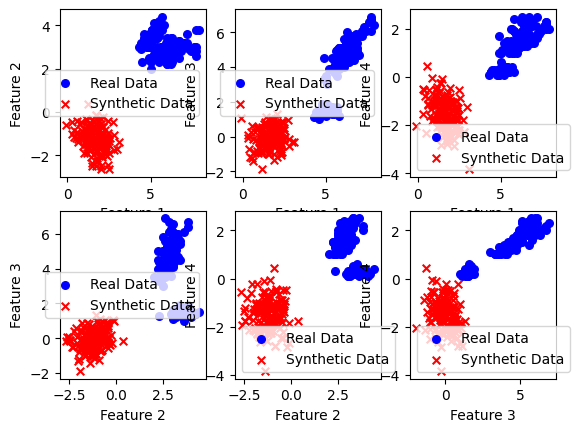

In [16]:
for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(2, 3, plot_idx)
        plt.scatter(x_train[:, i], x_train[:, j], label='Real Data', c='blue', marker='o', s=30)
        plt.scatter(synthetic_data[:, i], synthetic_data[:, j], label='Synthetic Data', c='red', marker='x',s=30)
        plt.xlabel(f'Feature {i + 1}')
        plt.ylabel(f'Feature {j + 1}')
        plt.legend()
        plot_idx += 1

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>